In [1]:
import networks as nx
import numpy as np
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

In [2]:
from adiaframe import Hamiltonian
from adiaframe import utils_c as uc

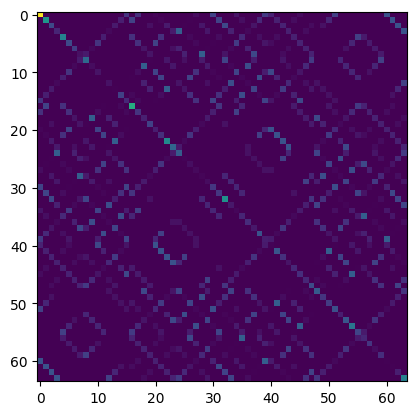

In [3]:
from random import random
# Test with real Hamiltonian terms
pstrs = pd.read_csv("H3+-2.1_node.csv")["Pstring"]
pauli_sample = {}
for p in pstrs:
    pauli_sample[p] = random()
H = Hamiltonian.p_poly_to_H(pauli_sample)
plt.imshow(np.abs(H))

In [5]:
hamiltonian = Hamiltonian(H, pauli_basis=pauli_sample, commute_map=True)
hamiltonian.local_decomposition.head(15)

,Pstring,type,Z,X,Coef
0,IIIIII,0,0,0,0.239214
1,IIIIIZ,0,1,0,0.329541
2,IIIIZI,0,2,0,0.882144
3,IIIIZZ,0,3,0,0.940421
4,IIIZII,0,4,0,0.658208
5,IIIZIZ,0,5,0,0.660470
6,IIIZZI,0,6,0,0.396806
7,IIZIII,0,8,0,0.043684
8,IIZIIZ,0,9,0,0.439808
9,IIZIZI,0,10,0,0.989429


In [6]:
from itertools import combinations

In [7]:
df = hamiltonian.local_decomposition
edge_df = pd.DataFrame(combinations(df["Pstring"].values ,2), columns=['source', 'target'])
        
edge_df = edge_df.merge(df[["Pstring", "Z", "X"]], how="left", left_on="source", right_on='Pstring').drop("Pstring", axis=1)
edge_df.rename(columns={"Z": "Zs", "X": "Xs"}, inplace=True)
edge_df = edge_df.merge(df[["Pstring", "Z", "X"]], how="left", left_on="target", right_on='Pstring').drop("Pstring", axis=1)
edge_df.rename(columns={"Z": "Zt", "X": "Xt"}, inplace=True)

In [12]:
from adiaframe.utils import commute_reggio_df

In [40]:
edge_df[["Zs", "Xs", "Zt", "Xt"]].apply(commute_reggio_df, axis=1)

Zs    0
Xs    0
Zt    1
Xt    0
Name: 0, dtype: int64
Zs    0
Xs    0
Zt    2
Xt    0
Name: 1, dtype: int64
Zs    0
Xs    0
Zt    3
Xt    0
Name: 2, dtype: int64
Zs    0
Xs    0
Zt    4
Xt    0
Name: 3, dtype: int64
Zs    0
Xs    0
Zt    5
Xt    0
Name: 4, dtype: int64
Zs    0
Xs    0
Zt    6
Xt    0
Name: 5, dtype: int64
Zs    0
Xs    0
Zt    8
Xt    0
Name: 6, dtype: int64
Zs    0
Xs    0
Zt    9
Xt    0
Name: 7, dtype: int64
Zs     0
Xs     0
Zt    10
Xt     0
Name: 8, dtype: int64
Zs     0
Xs     0
Zt    12
Xt     0
Name: 9, dtype: int64
Zs     0
Xs     0
Zt    16
Xt     0
Name: 10, dtype: int64
Zs     0
Xs     0
Zt    17
Xt     0
Name: 11, dtype: int64
Zs     0
Xs     0
Zt    18
Xt     0
Name: 12, dtype: int64
Zs     0
Xs     0
Zt    20
Xt     0
Name: 13, dtype: int64
Zs     0
Xs     0
Zt    24
Xt     0
Name: 14, dtype: int64
Zs     0
Xs     0
Zt    32
Xt     0
Name: 15, dtype: int64
Zs     0
Xs     0
Zt    33
Xt     0
Name: 16, dtype: int64
Zs     0
Xs     0
Zt    34
Xt     0
Nam

0        True
1        True
2        True
3        True
4        True
        ...  
2140    False
2141    False
2142    False
2143    False
2144     True
Length: 2145, dtype: bool

In [3]:
def func(s):
    uc.bit_count
    a = uc.bit_count(s.iloc[:, 0] & s.iloc[:,3])%2
    b = uc.bit_count(s.iloc[:, 1] & s.iloc[:,2])%2
    return a==b

In [4]:
hamiltonian.commute_map.loc[["Zs", "Xs", "Zt", "Xt"]].apply(func, axis=1)

NameError: name 'hamiltonian' is not defined

In [1]:
from c_modules import utils_c as uc

In [6]:
uc.lib.xz_coef_pow(3, 7)

1

In [5]:
uc.pauli_xz_product_coef(3, 7)

1j

## Test with Network optimization algorithm

## Kurita et al

## Hyunseong's basis transform weights

## Combination with Pauli-frame method

How to align 
S, H, CNOT weight?